<a href="https://colab.research.google.com/github/amoghgopadi/IMDB-Reviews/blob/main/IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Dataset

In [1]:
!wget http://s3.amazonaws.com/text-datasets/aclImdb.zip

--2021-03-02 04:33:14--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.254|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip’

aclImdb.zip         100%[===================>]  57.90M  35.0MB/s    in 1.7s    

2021-03-02 04:33:16 (35.0 MB/s) - ‘aclImdb.zip’ saved [60711700/60711700]



In [2]:
! unzip 'aclImdb.zip' -d 'IMDB-raw'

Streaming output truncated to the last 5000 lines.
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7755_9.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7756_10.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7757_9.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7758_7.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7759_10.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: IMDB-raw/aclImdb/train/pos/775_7.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7760_10.txt  
  inflating: IMDB-raw/__MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: IMDB-raw/aclImdb/train/pos/7761_10.txt  
  inflat

In [6]:
import os

imdb_dir = 'IMDB-raw/aclImdb'

train_dir = os.path.join(imdb_dir, 'train')
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)

print(len(texts), len(labels))

50000 50000


In [8]:
! pip install -U gensim

import gensim

from gensim.parsing.preprocessing import remove_stopwords

     |████████████████████████████████| 24.2MB 1.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [9]:
for i in range(len(texts)):
  texts[i] = remove_stopwords(texts[i])

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


training_samples = 40000
validation_samples = 5000
testing_samples = 5000

maxlength = 400 #max([len(s.split()) for s in texts])
vocab_size = 20000 #len(tokenizer.word_index) + 1'''

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlength, padding = 'post')
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

"""
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]"""

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

x_test = data[training_samples + validation_samples : training_samples + validation_samples + testing_samples]
y_test = labels[training_samples + validation_samples : training_samples + validation_samples + testing_samples]

Found 123273 unique tokens.
Shape of data tensor: (50000, 400)
Shape of label tensor: (50000,)


In [25]:
print('Training samples : %d' %(len(x_train)))
print('Training labels : %d' %(len(y_train)))

print('Validation samples : %d' %(len(x_val)))
print('Validation labels : %d' %(len(y_val)))

print('Testing samples : %d' %(len(x_test)))
print('Testing labels : %d' %(len(y_test)))

Training samples : 40000
Training labels : 40000
Validation samples : 5000
Validation labels : 5000
Testing samples : 5000
Testing labels : 5000


# GloVe embeddings

In [12]:
! wget 'https://resources.oreilly.com/conferences/natural-language-processing-with-deep-learning/raw/fa9a1c9182077fe1306ac07776366ad2de7489f6/data/glove.6B.100d.txt?inline=false'

--2021-03-02 02:38:22--  https://resources.oreilly.com/conferences/natural-language-processing-with-deep-learning/raw/fa9a1c9182077fe1306ac07776366ad2de7489f6/data/glove.6B.100d.txt?inline=false
Resolving resources.oreilly.com (resources.oreilly.com)... 199.27.144.212, 199.27.144.213
Connecting to resources.oreilly.com (resources.oreilly.com)|199.27.144.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘glove.6B.100d.txt?inline=false’

glove.6B.100d.txt?i 100%[===================>] 331.04M  7.26MB/s    in 35s     

2021-03-02 02:38:58 (9.49 MB/s) - ‘glove.6B.100d.txt?inline=false’ saved [347116733/347116733]



In [26]:
embeddings_index = {}
f = open( 'glove.6B.100d.txt?inline=false')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [27]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
  if i < vocab_size:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

# Prepare Model

In [28]:
import keras

callbacks_list = [ 
keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10,)   # Reduces Learning Rate by 10 if val_loss does not improve
]

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, GRU

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlength))
model.add(GRU(units = 64, dropout = 0.2, return_sequences=True))
model.add(GRU(units = 32, dropout = 0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 100)          2000000   
_________________________________________________________________
gru_4 (GRU)                  (None, 400, 64)           31872     
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,041,313
Trainable params: 2,041,313
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, callbacks = callbacks_list, 
                    validation_data=(x_val, y_val))

#model.save_weights('pre_trained_glove_model.h5')

Epoch 1/20
1250/1250 [==============================] - 33s 25ms/step - loss: 0.6649 - acc: 0.6231 - val_loss: 0.9172 - val_acc: 0.0110
Epoch 2/20
1250/1250 [==============================] - 31s 24ms/step - loss: 0.6606 - acc: 0.6259 - val_loss: 1.0978 - val_acc: 0.0204
Epoch 3/20
1250/1250 [==============================] - 31s 25ms/step - loss: 0.6589 - acc: 0.6288 - val_loss: 1.0189 - val_acc: 0.0152
Epoch 4/20
1250/1250 [==============================] - 31s 25ms/step - loss: 0.6523 - acc: 0.6344 - val_loss: 0.9502 - val_acc: 0.0184
Epoch 5/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.6063 - acc: 0.6890 - val_loss: 0.9229 - val_acc: 0.4054
Epoch 6/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.4872 - acc: 0.7895 - val_loss: 0.5271 - val_acc: 0.7790
Epoch 7/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.3412 - acc: 0.8535 - val_loss: 0.3265 - val_acc: 0.8720
Epoch 8/20
1250/1250 [==========================

In [32]:
model.evaluate(x_test,y_test)

157/157 [==============================] - 2s 12ms/step - loss: 0.2957 - acc: 0.8778


[0.2957383692264557, 0.8777999877929688]

In [33]:
sample_texts = ['I am Happy for you', 'I am sad']
sample_sequences = tokenizer.texts_to_sequences(sample_texts)

sample_data = pad_sequences(sample_sequences, maxlen=maxlength, padding = 'post')

model.predict(sample_data)

array([[0.8676623 ],
       [0.12863092]], dtype=float32)

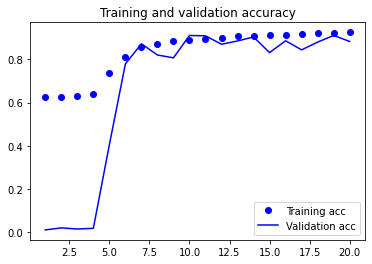

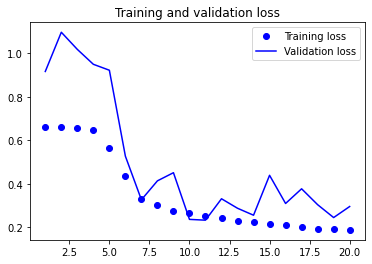

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()